**Oleksiy Anokhin**

May 18, 2020

### Data Cleaning for DEPA Group Project

**1. Cleaning Bus Routes daily data**

Source: https://data.cityofchicago.org/Transportation/CTA-Ridership-Bus-Routes-Daily-Totals-by-Route/jyb9-n7fm

In [2]:
# Install packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# import folium
# import json
# from folium import plugins

In [2]:
# !pip install sorted-months-weekdays
# !pip install sort-dataframeby-monthorweek
# !pip install folium
# from sorted_months_weekdays import *
# from sort_dataframeby_monthorweek import *
# from matplotlib.ticker import FuncFormatter
# scientific_formatter = FuncFormatter(scientific)

In [53]:
# Read data
buses = pd.read_csv('CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route.csv')  

# See the structure
print(buses.head())

# Check the basic information about file
print(buses.info())

  route        date daytype  rides
0     3  01/01/2001       U   7354
1     4  01/01/2001       U   9288
2     6  01/01/2001       U   6048
3     8  01/01/2001       U   6309
4     9  01/01/2001       U  11207
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855750 entries, 0 to 855749
Data columns (total 4 columns):
route      855750 non-null object
date       855750 non-null object
daytype    855750 non-null object
rides      855750 non-null int64
dtypes: int64(1), object(3)
memory usage: 26.1+ MB
None


In [34]:
# Calculate the number of unique routes
buses['route'].nunique()

185

In [54]:
# Check the format of columns
print(buses.dtypes)

# Convert into date into 'date' format
buses['date'] =  pd.to_datetime(buses['date'], format = '%m/%d/%Y')

# Show 'date' type columns
buses.select_dtypes(include=[np.datetime64])

route      object
date       object
daytype    object
rides       int64
dtype: object


,date
0,2001-01-01
1,2001-01-01
2,2001-01-01
3,2001-01-01
4,2001-01-01
...,...
855745,2020-03-24
855746,2020-03-25
855747,2020-03-26
855748,2020-03-30


In [56]:
print(buses)

       route       date daytype  rides
0          3 2001-01-01       U   7354
1          4 2001-01-01       U   9288
2          6 2001-01-01       U   6048
3          8 2001-01-01       U   6309
4          9 2001-01-01       U  11207
...      ...        ...     ...    ...
855745   X98 2020-03-24       W      3
855746   X98 2020-03-25       W      7
855747   X98 2020-03-26       W      8
855748   X98 2020-03-30       W      7
855749   X98 2020-03-31       W      8

[855750 rows x 4 columns]


In [58]:
# Filter data for 2019 and 2020 only
buses_19_20 = (buses['date'] >= '2019-01-01') & (buses['date'] <= '2020-03-31')
print(buses_19_20)
# print(buses_19_20.loc[buses_19_20])

0         False
1         False
2         False
3         False
4         False
          ...  
855745     True
855746     True
855747     True
855748     True
855749     True
Name: date, Length: 855750, dtype: bool


In [18]:
# Group by date (day)
buses_19_20 = buses.loc[buses_19_20]
buses_19_20 = buses_19_20.groupby('date', as_index = False)['rides'].sum()
print(buses_19_20)

          date   rides
0   2019-01-01  247279
1   2019-01-02  585996
2   2019-01-03  660631
3   2019-01-04  662011
4   2019-01-05  440848
..         ...     ...
451 2020-03-27  218499
452 2020-03-28  143305
453 2020-03-29  110833
454 2020-03-30  207743
455 2020-03-31  199623

[456 rows x 2 columns]


In [ ]:
buses_19_20.to_csv('l_stations_final.csv', sep = ',', index = False)

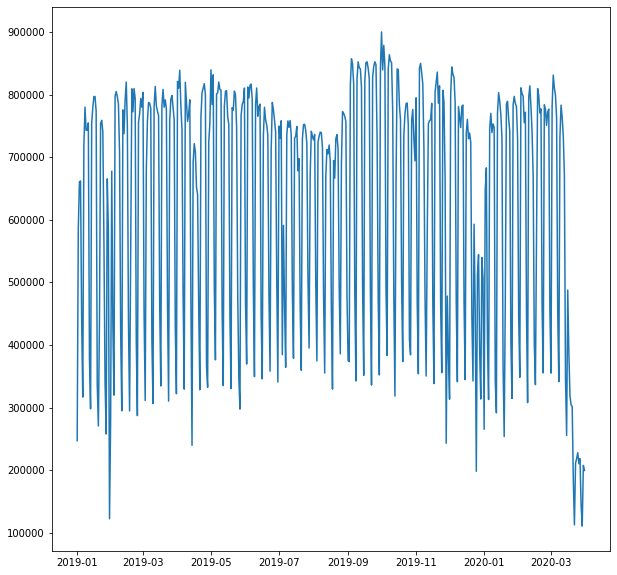

In [131]:
# Visualize rides by day
plt.plot(daily_buses_grouped.date, daily_buses_grouped.rides)
# IMPORTANT: I am leaving this as it is for now, because we will use Tableau. 

In [129]:
# Export files to xlsx
print(daily_buses_grouped)
daily_buses_grouped.to_excel("!CLEANED daily_buses_grouped.xlsx", index = False)

          date   rides
0   2019-01-01  804863
1   2019-01-02  796479
2   2019-01-03  784856
3   2019-01-04  707423
4   2019-01-05  421312
..         ...     ...
416 2020-02-21  218499
417 2020-02-22  143305
418 2020-02-23  110833
419 2020-02-24  207743
420 2020-02-25  199623

[421 rows x 2 columns]


In [132]:
monthly_buses_grouped = daily_buses_grouped.groupby([daily_buses_grouped['date'].dt.year.rename('year'), 
                                    daily_buses_grouped['date'].dt.month_name().rename('month')])['rides'].sum().reset_index()
print(monthly_buses_grouped)

    year      month     rides
0   2019      April  20135774
1   2019     August  22244396
2   2019   December  19741892
3   2019   February  18814902
4   2019    January  20519642
5   2019       July  19837741
6   2019       June  18916862
7   2019      March  19886121
8   2019        May  20412447
9   2019   November  16801895
10  2019    October  20345054
11  2019  September  20155807
12  2020   February   8926743
13  2020    January  20810302


In [133]:
# Export to xlsx
monthly_buses_grouped.to_excel("!CLEANED monthly_buses_grouped.xlsx", index = False)

    year      month     rides
0   2019      April  19816966
1   2019     August  19751742
2   2019   December  18416176
3   2019   February  18172286
4   2019    January  17341152
5   2019       July  19795636
6   2019       June  19641174
7   2019      March  20138291
8   2019        May  21014410
9   2019   November  19184367
10  2019    October  21650358
11  2019  September  20714014
    year     month     rides
12  2020  February  18875888
13  2020   January  19338248
14  2020     March  13267884


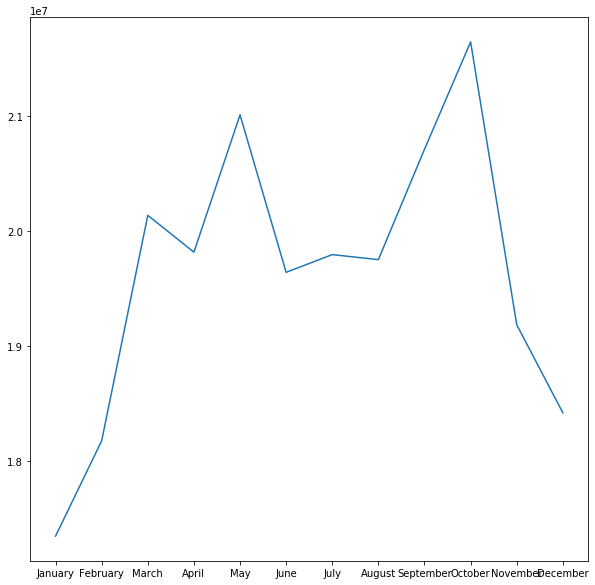

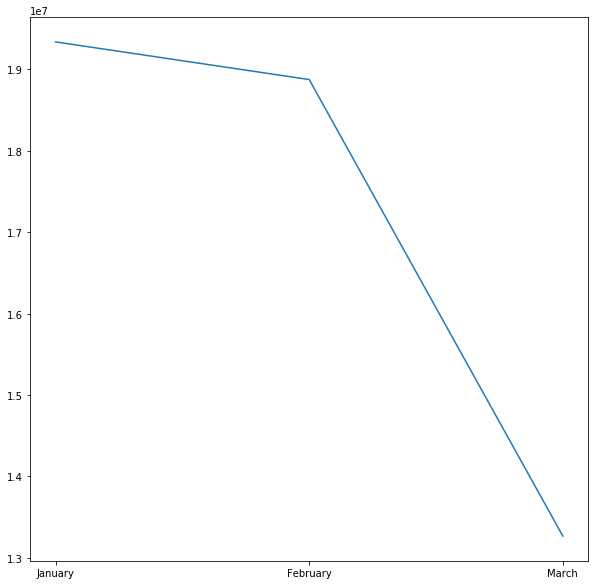

In [133]:
# Visualize rides by month in 2019 and 2020 separately
months_2019 = monthly_buses_grouped[(monthly_buses_grouped['year'] == 2019)]
print(months_2019)
months_2020 = monthly_buses_grouped[(monthly_buses_grouped['year'] == 2020)]
print(months_2020)

months_2019 = Sort_Dataframeby_MonthandNumeric_cols(df = months_2019, monthcolumn = 'month', numericcolumn = 'rides')
months_2020 = Sort_Dataframeby_MonthandNumeric_cols(df = months_2020, monthcolumn = 'month', numericcolumn = 'rides')
plt.plot(months_2019.month, months_2019.rides)
plt.show()
plt.plot(months_2020.month, months_2020.rides)
plt.show()

**2. Cleaning Station entries daily data**

Source: https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f

In [84]:
# Read data
daily_stations = pd.read_csv('CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv')  

# See the structure
print(daily_stations.head())

# Check the basic information about file
print(daily_stations.info())

   station_id       stationname        date daytype  rides
0       40850           Library  10/09/2004       A   1057
1       40780      Central Park  06/18/2010       W   1154
2       41500    Montrose-Brown  10/30/2001       W   2116
3       40500  Washington/State  10/26/2006       W      0
4       41090      Monroe/State  07/07/2010       W   9431
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001871 entries, 0 to 1001870
Data columns (total 5 columns):
station_id     1001871 non-null int64
stationname    1001871 non-null object
date           1001871 non-null object
daytype        1001871 non-null object
rides          1001871 non-null int64
dtypes: int64(2), object(3)
memory usage: 38.2+ MB
None


In [85]:
# Drop daytype table
daily_stations.drop(daily_stations.columns[[-2]], axis = 1, inplace = True)
print(daily_stations)

         station_id        stationname        date  rides
0             40850            Library  10/09/2004   1057
1             40780       Central Park  06/18/2010   1154
2             41500     Montrose-Brown  10/30/2001   2116
3             40500   Washington/State  10/26/2006      0
4             41090       Monroe/State  07/07/2010   9431
...             ...                ...         ...    ...
1001866       41700  Washington/Wabash  03/27/2020   1052
1001867       41700  Washington/Wabash  03/28/2020    535
1001868       41700  Washington/Wabash  03/29/2020    468
1001869       41700  Washington/Wabash  03/30/2020   1023
1001870       41700  Washington/Wabash  03/31/2020   1038

[1001871 rows x 4 columns]


In [73]:
# Check the format of columns
# print(daily_stations.dtypes)

# Convert into date into 'date' format
# daily_stations['date'] =  pd.to_datetime(daily_stations['date'], format = '%m/%d/%Y')

# Show 'date' type columns
# daily_stations.select_dtypes(include = [np.datetime64])

In [62]:
# Filter data for 2019 and 2020 only
# print(daily_stations['date'] >= '2019-01-01') & (daily_stations['date'] <= '2020-03-31')

In [13]:
# Group by date (day)
# daily_stations_19_20 = daily_stations.loc[daily_stations_19_20]
# daily_stations_grouped = daily_stations_19_20.groupby('date', as_index = False)['rides'].sum()
# print(daily_stations_grouped)

In [143]:
# Export to xlsx
# daily_stations_grouped.to_excel("!CLEANED daily_stations_grouped.xlsx", index = False)

In [86]:
# Reading clean L stations data 
l_stations = pd.read_csv('l_stations_data.csv')  
print(l_stations.head())

   stop_id direction_id                        stop_name  \
0    30162            W         18th (54th/Cermak-bound)   
1    30161            E                18th (Loop-bound)   
2    30022            N         35th/Archer (Loop-bound)   
3    30023            S       35th/Archer (Midway-bound)   
4    30214            S  35-Bronzeville-IIT (63rd-bound)   

           station_name           station_descriptive_name  map_id   ada  \
0                  18th                   18th (Pink Line)   40830  True   
1                  18th                   18th (Pink Line)   40830  True   
2           35th/Archer          35th/Archer (Orange Line)   40120  True   
3           35th/Archer          35th/Archer (Orange Line)   40120  True   
4  35th-Bronzeville-IIT  35th-Bronzeville-IIT (Green Line)   41120  True   

     red   blue      g    brn      p   pexp      y    pnk      o   latitude  \
0  False  False  False  False  False  False  False   True  False  41.857908   
1  False  False  False  

In [87]:
# Select only necessary columns
l_stations = l_stations[['map_id','longitude', 'latitude', 'zip_code']]
print(l_stations.head())

   map_id  longitude   latitude  zip_code
0   40830 -87.669147  41.857908     60608
1   40830 -87.669147  41.857908     60608
2   40120 -87.680622  41.829353     60609
3   40120 -87.680622  41.829353     60609
4   41120 -87.625826  41.831677     60616


In [88]:
l_stations_hubs = l_stations.groupby(['map_id','longitude','latitude','zip_code']).size().reset_index(name = 'hub')

l_stations_hubs['hub'] = l_stations_hubs['hub'].replace(1,0).apply(lambda x:min(x, 1))

In [89]:
# Rename map_id into station id
l_stations_hubs = l_stations_hubs.rename(columns = {"map_id": "station_id"})

In [90]:
print(l_stations_hubs)

     station_id  longitude   latitude  zip_code  hub
0         40010 -87.776812  41.870851     60304    1
1         40020 -87.803176  41.886848     60301    1
2         40030 -87.725404  41.885412     60624    1
3         40040 -87.633740  41.878723     60606    1
4         40050 -87.683543  42.047710     60201    1
..          ...        ...        ...       ...  ...
139       41660 -87.627813  41.884809     60601    1
140       41670 -87.716523  41.884904     60624    1
141       41680 -87.747221  42.026243     60077    1
142       41690 -87.626402  41.853115     60616    1
143       41700 -87.626189  41.883220     60602    1

[144 rows x 5 columns]


In [91]:
# Merge two datasets
print(daily_stations)
print(l_stations_hubs)

         station_id        stationname        date  rides
0             40850            Library  10/09/2004   1057
1             40780       Central Park  06/18/2010   1154
2             41500     Montrose-Brown  10/30/2001   2116
3             40500   Washington/State  10/26/2006      0
4             41090       Monroe/State  07/07/2010   9431
...             ...                ...         ...    ...
1001866       41700  Washington/Wabash  03/27/2020   1052
1001867       41700  Washington/Wabash  03/28/2020    535
1001868       41700  Washington/Wabash  03/29/2020    468
1001869       41700  Washington/Wabash  03/30/2020   1023
1001870       41700  Washington/Wabash  03/31/2020   1038

[1001871 rows x 4 columns]
     station_id  longitude   latitude  zip_code  hub
0         40010 -87.776812  41.870851     60304    1
1         40020 -87.803176  41.886848     60301    1
2         40030 -87.725404  41.885412     60624    1
3         40040 -87.633740  41.878723     60606    1
4         4

In [96]:
# Merged
test = pd.merge(daily_stations, l_stations_hubs, on = 'station_id', how = 'left')
print(test.head())

   station_id       stationname        date  rides  longitude   latitude  \
0       40850           Library  10/09/2004   1057 -87.628196  41.876862   
1       40780      Central Park  06/18/2010   1154 -87.714842  41.853839   
2       41500    Montrose-Brown  10/30/2001   2116 -87.675047  41.961756   
3       40500  Washington/State  10/26/2006      0        NaN        NaN   
4       41090      Monroe/State  07/07/2010   9431 -87.627696  41.880745   

   zip_code  hub  
0   60605.0  1.0  
1   60623.0  1.0  
2   60640.0  1.0  
3       NaN  NaN  
4   60603.0  1.0  


In [104]:
# Check the info about columns
print(test.info())
# test['date'] =  pd.to_datetime(test['date'], format = '%m/%d/%Y')
test.select_dtypes(include=[np.datetime64])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008913 entries, 0 to 1008912
Data columns (total 8 columns):
station_id     1008913 non-null int64
stationname    1008913 non-null object
date           1008913 non-null datetime64[ns]
rides          1008913 non-null int64
longitude      993106 non-null float64
latitude       993106 non-null float64
zip_code       993106 non-null float64
hub            993106 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 69.3+ MB
None


,date
0,2004-10-09
1,2010-06-18
2,2001-10-30
3,2006-10-26
4,2010-07-07
...,...
1008908,2020-03-27
1008909,2020-03-28
1008910,2020-03-29
1008911,2020-03-30


In [108]:
# Subset data for 2019 and 2020 only
mask = (test['date'] >= '2019-01-01') & (test['date'] <= '2020-03-31')
l_stations_final = test.loc[mask]
print(l_stations_final)

         station_id         stationname       date  rides  longitude  \
943218        40010  Austin-Forest Park 2019-01-01    576 -87.776812   
943219        40010  Austin-Forest Park 2019-01-02   1457 -87.776812   
943220        40010  Austin-Forest Park 2019-01-03   1543 -87.776812   
943221        40010  Austin-Forest Park 2019-01-04   1621 -87.776812   
943222        40010  Austin-Forest Park 2019-01-05    719 -87.776812   
...             ...                 ...        ...    ...        ...   
1008908       41700   Washington/Wabash 2020-03-27   1052 -87.626189   
1008909       41700   Washington/Wabash 2020-03-28    535 -87.626189   
1008910       41700   Washington/Wabash 2020-03-29    468 -87.626189   
1008911       41700   Washington/Wabash 2020-03-30   1023 -87.626189   
1008912       41700   Washington/Wabash 2020-03-31   1038 -87.626189   

          latitude  zip_code  hub  
943218   41.870851   60304.0  1.0  
943219   41.870851   60304.0  1.0  
943220   41.870851   60304.

In [109]:
print(l_stations_final)

         station_id         stationname       date  rides  longitude  \
943218        40010  Austin-Forest Park 2019-01-01    576 -87.776812   
943219        40010  Austin-Forest Park 2019-01-02   1457 -87.776812   
943220        40010  Austin-Forest Park 2019-01-03   1543 -87.776812   
943221        40010  Austin-Forest Park 2019-01-04   1621 -87.776812   
943222        40010  Austin-Forest Park 2019-01-05    719 -87.776812   
...             ...                 ...        ...    ...        ...   
1008908       41700   Washington/Wabash 2020-03-27   1052 -87.626189   
1008909       41700   Washington/Wabash 2020-03-28    535 -87.626189   
1008910       41700   Washington/Wabash 2020-03-29    468 -87.626189   
1008911       41700   Washington/Wabash 2020-03-30   1023 -87.626189   
1008912       41700   Washington/Wabash 2020-03-31   1038 -87.626189   

          latitude  zip_code  hub  
943218   41.870851   60304.0  1.0  
943219   41.870851   60304.0  1.0  
943220   41.870851   60304.

In [110]:
l_stations_final.isnull().sum()

station_id      0
stationname     0
date            0
rides           0
longitude      31
latitude       31
zip_code       31
hub            31
dtype: int64

In [120]:
# Drop NAs 
l_stations_final = l_stations_final.dropna(subset = ['longitude', 'latitude', 'zip_code', 'hub'], how = 'all')
print(l_stations_final)
l_stations_final.isnull().sum()

         station_id         stationname       date  rides  longitude  \
943218        40010  Austin-Forest Park 2019-01-01    576 -87.776812   
943219        40010  Austin-Forest Park 2019-01-02   1457 -87.776812   
943220        40010  Austin-Forest Park 2019-01-03   1543 -87.776812   
943221        40010  Austin-Forest Park 2019-01-04   1621 -87.776812   
943222        40010  Austin-Forest Park 2019-01-05    719 -87.776812   
...             ...                 ...        ...    ...        ...   
1008908       41700   Washington/Wabash 2020-03-27   1052 -87.626189   
1008909       41700   Washington/Wabash 2020-03-28    535 -87.626189   
1008910       41700   Washington/Wabash 2020-03-29    468 -87.626189   
1008911       41700   Washington/Wabash 2020-03-30   1023 -87.626189   
1008912       41700   Washington/Wabash 2020-03-31   1038 -87.626189   

          latitude  zip_code  hub  
943218   41.870851   60304.0  1.0  
943219   41.870851   60304.0  1.0  
943220   41.870851   60304.

station_id     0
stationname    0
date           0
rides          0
longitude      0
latitude       0
zip_code       0
hub            0
dtype: int64

In [121]:
# Check types of columns and convert them
cols = ['zip_code', 'hub']
l_stations_final[cols] = l_stations_final[cols].applymap(np.int64)

In [126]:
# Check the info about columns
print(l_stations_final.info())
print(l_stations_final.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65664 entries, 943218 to 1008912
Data columns (total 8 columns):
station_id      65664 non-null int64
station_name    65664 non-null object
date            65664 non-null datetime64[ns]
rides           65664 non-null int64
longitude       65664 non-null float64
latitude        65664 non-null float64
zip_code        65664 non-null int64
hub             65664 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 4.5+ MB
None
        station_id        station_name       date  rides  longitude  \
943218       40010  Austin-Forest Park 2019-01-01    576 -87.776812   
943219       40010  Austin-Forest Park 2019-01-02   1457 -87.776812   
943220       40010  Austin-Forest Park 2019-01-03   1543 -87.776812   
943221       40010  Austin-Forest Park 2019-01-04   1621 -87.776812   
943222       40010  Austin-Forest Park 2019-01-05    719 -87.776812   

         latitude  zip_code  hub  
943218  41.870851     60304

In [125]:
# Rename and export
l_stations_final = l_stations_final.rename(columns = {"stationname": "station_name"})

In [127]:
# Export
l_stations_final.to_csv('l_stations_final.csv', sep = ',', index = False)

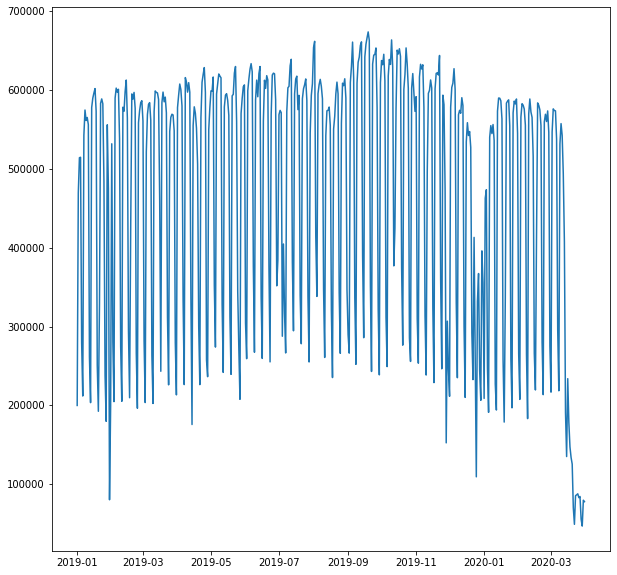

In [145]:
# Visualize station entries by day
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(daily_stations_grouped.date, daily_stations_grouped.rides)
# IMPORTANT: I am leaving this as it is for now, because we will use Tableau. 
# We can see a significant drop of passagers, entering the stations - from 650K to someting close to 65K per day

In [148]:
monthly_stations_grouped = daily_stations_grouped.groupby([daily_stations_grouped['date'].dt.year.rename('year'), 
                                    daily_stations_grouped['date'].dt.month_name().rename('month')])['rides'].sum().reset_index()
print(monthly_stations_grouped)

    year      month     rides
0   2019      April  14995232
1   2019     August  15917367
2   2019   December  13104631
3   2019   February  13407429
4   2019    January  13134311
5   2019       July  15669325
6   2019       June  15336417
7   2019      March  14746263
8   2019        May  15735446
9   2019   November  14324156
10  2019    October  16936271
11  2019  September  15764357
12  2020   February  13365729
13  2020    January  14054329
14  2020      March   8024293


In [149]:
# Export to xlsx
monthly_stations_grouped.to_excel("!CLEANED monthly_stations_grouped.xlsx", index = False)

    year      month     rides
0   2019      April  14995232
1   2019     August  15917367
2   2019   December  13104631
3   2019   February  13407429
4   2019    January  13134311
5   2019       July  15669325
6   2019       June  15336417
7   2019      March  14746263
8   2019        May  15735446
9   2019   November  14324156
10  2019    October  16936271
11  2019  September  15764357
    year     month     rides
12  2020  February  13365729
13  2020   January  14054329
14  2020     March   8024293


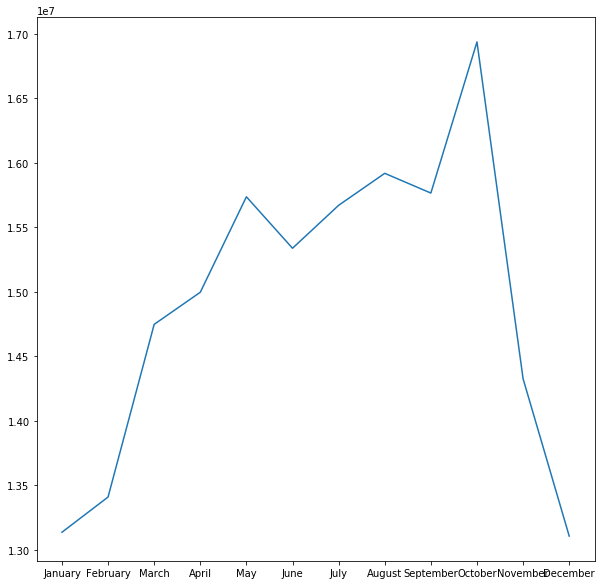

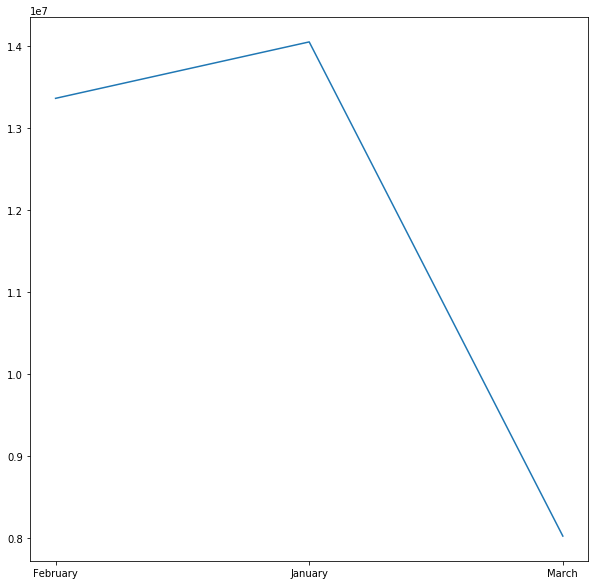

In [122]:
# Visualize entries by month in 2019 and 2020 separately
e_months_2019 = daily_stations_grouped[(daily_stations_grouped['year'] == 2019)]
print(e_months_2019)
e_months_2020 = daily_stations_grouped[(daily_stations_grouped['year'] == 2020)]
print(e_months_2020)

e_months_2019 = Sort_Dataframeby_MonthandNumeric_cols(df = e_months_2019, monthcolumn = 'month', numericcolumn = 'rides')
plt.plot(e_months_2019.month, e_months_2019.rides)
plt.show()
plt.plot(e_months_2020.month, e_months_2020.rides)
plt.show()

**3. Cleaning Boarding daily data**

Source: https://data.cityofchicago.org/Transportation/CTA-Ridership-Daily-Boarding-Totals/6iiy-9s97

In [23]:
# Read data
boarding = pd.read_csv('CTA_-_Ridership_-_Daily_Boarding_Totals.csv')

# Rename service_date date column
# boarding = boarding.rename(columns = {"service_date": "date"})
# print(boarding)

# See the structure
print(boarding.head())

# Check the basic information about file
print(boarding.info())

  service_date day_type     bus  rail_boardings  total_rides
0   01/01/2001        U  297192          126455       423647
1   01/02/2001        W  780827          501952      1282779
2   01/03/2001        W  824923          536432      1361355
3   01/04/2001        W  870021          550011      1420032
4   01/05/2001        W  890426          557917      1448343
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7092 entries, 0 to 7091
Data columns (total 5 columns):
service_date      7092 non-null object
day_type          7092 non-null object
bus               7092 non-null int64
rail_boardings    7092 non-null int64
total_rides       7092 non-null int64
dtypes: int64(3), object(2)
memory usage: 277.2+ KB
None


In [24]:
bikes = pd.read_csv('bike data.csv')
print(bikes)
# total = pd.concat([boarding, bikes])
# print(total)

           date  total
0    2019-01-01   1312
1    2019-01-02   4170
2    2019-01-03   5618
3    2019-01-04   6793
4    2019-01-05   6179
..          ...    ...
451  2020-03-27   1490
452  2020-03-28   1443
453  2020-03-29   1461
454  2020-03-30   1938
455  2020-03-31   1622

[456 rows x 2 columns]


In [37]:
# Check the format of columns
print(boarding.dtypes)

# Rename service_date date column
boarding = boarding.rename(columns={"service_date": "date"})
print(boarding)

# Convert into date into 'date' format
boarding['date'] =  pd.to_datetime(boarding['date'], format = '%m/%d/%Y')
bikes['date'] =  pd.to_datetime(bikes['date'], format = '%Y/%m/%d')

# Show 'date' type columns
boarding.select_dtypes(include=[np.datetime64])

date              datetime64[ns]
day_type                  object
bus                        int64
rail_boardings             int64
total_rides                int64
dtype: object
           date day_type     bus  rail_boardings  total_rides
0    2001-01-01        U  297192          126455       423647
1    2001-01-02        W  780827          501952      1282779
2    2001-01-03        W  824923          536432      1361355
3    2001-01-04        W  870021          550011      1420032
4    2001-01-05        W  890426          557917      1448343
...         ...      ...     ...             ...          ...
7087 2020-03-27        W  220715          102714       323429
7088 2020-03-28        A  144561           68572       213133
7089 2020-03-29        U  111188           57736       168924
7090 2020-03-30        W  208762           96996       305758
7091 2020-03-31        W  200537           94709       295246

[7092 rows x 5 columns]


,date
0,2001-01-01
1,2001-01-02
2,2001-01-03
3,2001-01-04
4,2001-01-05
...,...
7087,2020-03-27
7088,2020-03-28
7089,2020-03-29
7090,2020-03-30


In [38]:
# Filter data for 2019 and 2020 only
boarding_19_20 = (boarding['date'] >= '2019-01-01') & (boarding['date'] <= '2020-03-31')
boarding_19_20 = boarding.loc[boarding_19_20]
print(boarding_19_20)

           date day_type     bus  rail_boardings  total_rides
6636 2019-01-01        U  248879          245852       494731
6637 2019-01-02        W  591006          573542      1164548
6638 2019-01-03        W  664442          627781      1292223
6639 2019-01-04        W  668812          628514      1297326
6640 2019-01-05        A  444434          348257       792691
...         ...      ...     ...             ...          ...
7087 2020-03-27        W  220715          102714       323429
7088 2020-03-28        A  144561           68572       213133
7089 2020-03-29        U  111188           57736       168924
7090 2020-03-30        W  208762           96996       305758
7091 2020-03-31        W  200537           94709       295246

[456 rows x 5 columns]


In [39]:
# Sort data
boarding_19_20 = boarding_19_20.sort_values(by = 'date')

In [40]:
# Export as xlsx
boarding_19_20.to_excel("!CLEANED boarding_19_20.xlsx", index = False)

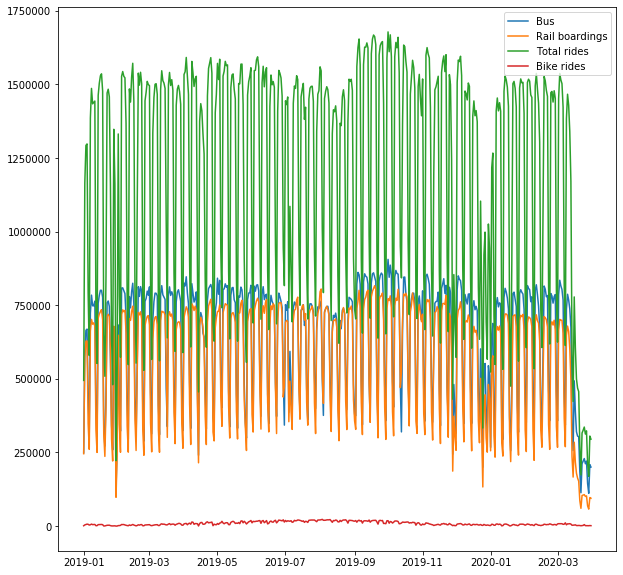

In [41]:
# Visualize all three by date
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(boarding_19_20.date, boarding_19_20.bus, label = 'Bus')
plt.plot(boarding_19_20.date, boarding_19_20.rail_boardings, label = 'Rail boardings')
plt.plot(boarding_19_20.date, boarding_19_20.total_rides, label = 'Total rides')
plt.plot(bikes.date, bikes.total, label = 'Bike rides')
plt.legend()
# IMPORTANT: I am leaving this as it is for now, because we will use Tableau. 
# An interesting question - looks like Christmas has a huge drop in mobility too. 

In [29]:
# Now let's try to present data by week
daily_buses['date'] = pd.to_datetime(daily_buses['date']) - pd.to_timedelta(7, unit = 'd')
buses_weekly = daily_buses.groupby([pd.Grouper(key = 'date', freq = 'W-MON')])['rides'].sum().reset_index().sort_values('date')
print(buses_weekly)
# But this is all since 

NameError: name 'daily_buses' is not defined

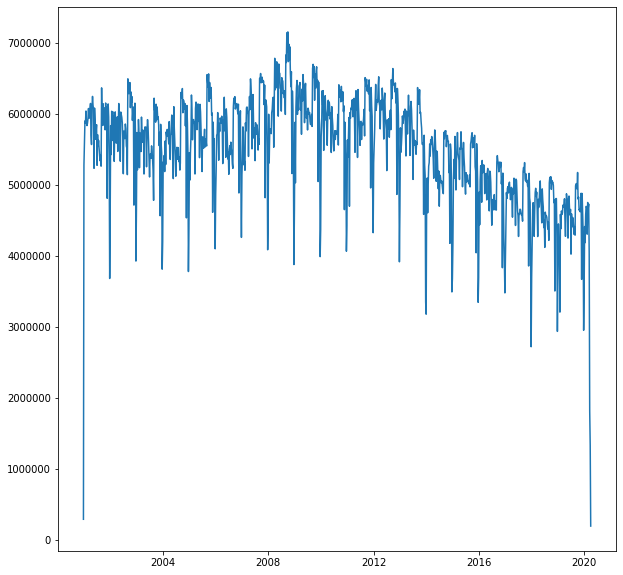

In [197]:
# Now let's plot
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(buses_weekly.date, buses_weekly.rides, label = 'Bus')
# But this is from 2001 all!

In [218]:
# Now let's try to present data by week
boarding_19_20['date'] = pd.to_datetime(boarding_19_20['date']) - pd.to_timedelta(7, unit = 'd')
boarding_weekly = boarding_19_20.groupby([pd.Grouper(key = 'date', freq = 'W-MON')])['bus', 'rail_boardings', 'total_rides'].sum().reset_index().sort_values('date')
print(boarding_weekly)

         date      bus  rail_boardings  total_rides
0  2018-12-31  3659219         3346972      7006191
1  2019-01-07  4484511         4037426      8521937
2  2019-01-14  4215213         3833749      8048962
3  2019-01-21  4106771         3928952      8035723
4  2019-01-28  3237197         2884975      6122172
..        ...      ...             ...          ...
61 2020-03-02  4755380         4038420      8793800
62 2020-03-09  4064552         3125151      7189703
63 2020-03-16  1830525          963597      2794122
64 2020-03-23  1346705          639103      1985808
65 2020-03-30   200537           94709       295246

[66 rows x 4 columns]


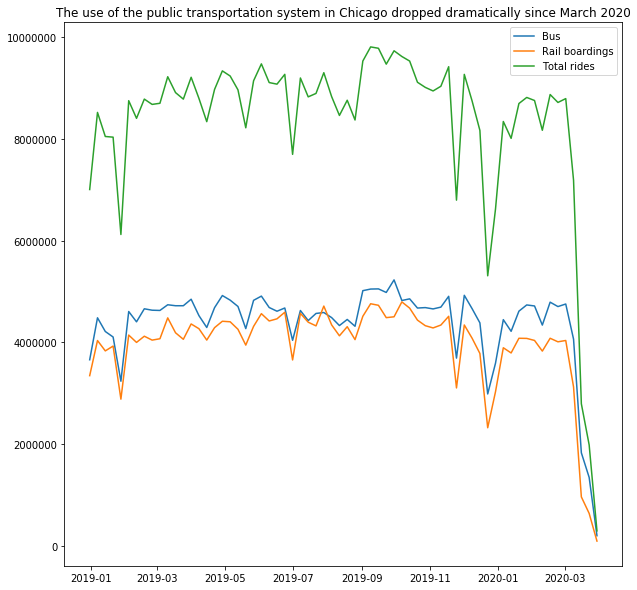

In [220]:
# Visualize all three by week
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(boarding_weekly.date, boarding_weekly.bus, label = 'Bus')
plt.plot(boarding_weekly.date, boarding_weekly.rail_boardings, label = 'Rail boardings')
plt.plot(boarding_weekly.date, boarding_weekly.total_rides, label = 'Total rides')
plt.title('The use of the public transportation system in Chicago dropped dramatically since March 2020')
plt.legend()
plt.ticklabel_format(axis = "y", style = 'plain')

In [221]:
# Export as xlsx
boarding_weekly.to_excel("!CLEANED boarding_weekly.xlsx", index = False)

**4. Cleaning COVID-19 weekly data**

Source: https://data.cityofchicago.org/Health-Human-Services/COVID-19-Progression-by-ZIP-Code/vrgd-sgft

In [3]:
covid_daily_cases = pd.read_csv('COVID-19_Daily_Cases_and_Deaths.csv')  

# See the head()
print(covid_daily_cases.head())

         Date  Cases - Total  Deaths - Total  Cases - Age 0-17  \
0  01/23/2020              1               0                 0   
1  03/17/2020             52               1                 1   
2  03/28/2020            318               4                 2   
3  04/14/2020            635              33                11   
4  03/06/2020              1               0                 0   

   Cases - Age 18-29  Cases - Age 30-39  Cases - Age 40-49  Cases - Age 50-59  \
0                  0                  0                  0                  0   
1                  8                  8                 14                  9   
2                 49                 48                 61                 67   
3                 82                110                113                136   
4                  0                  0                  0                  1   

   Cases - Age 60-69  Cases - Age 70-79  ...  Deaths - Age Unknown  \
0                  1                  0  ...  

In [4]:
# Select only columns with date, total cases, and total deaths
covid_daily_cases = covid_daily_cases[['Date','Cases - Total', 'Deaths - Total']]
print(covid_daily_cases.head())

         Date  Cases - Total  Deaths - Total
0  01/23/2020              1               0
1  03/17/2020             52               1
2  03/28/2020            318               4
3  04/14/2020            635              33
4  03/06/2020              1               0


In [5]:
# Sort by date, because now it is unsorted and it will create viz problems. 
covid_daily_cases = covid_daily_cases.sort_values(by = 'Date')
print(covid_daily_cases.head())

          Date  Cases - Total  Deaths - Total
0   01/23/2020              1               0
4   03/06/2020              1               0
5   03/08/2020              3               0
72  03/09/2020              1               0
6   03/10/2020              4               0


In [6]:
# Rename columns with cases and deaths
covid_daily_cases = covid_daily_cases.rename(columns = {'Cases - Total': 'Cases', 'Deaths - Total': 'Deaths'})
print(covid_daily_cases.head())

          Date  Cases  Deaths
0   01/23/2020      1       0
4   03/06/2020      1       0
5   03/08/2020      3       0
72  03/09/2020      1       0
6   03/10/2020      4       0


In [7]:
# Remove NAs, there is one NA at least at Date column
covid_daily_cases = covid_daily_cases[covid_daily_cases['Date'].notna()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


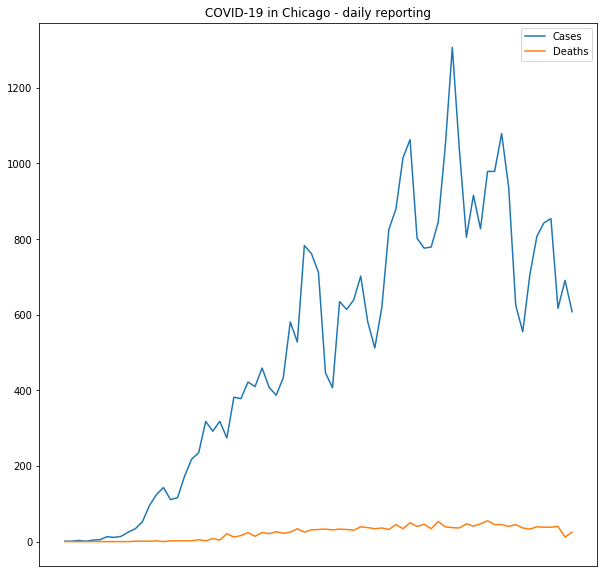

In [9]:
# Visualize all three by week
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(covid_daily_cases.Date, covid_daily_cases.Cases, label = 'Cases')
plt.plot(covid_daily_cases.Date, covid_daily_cases.Deaths, label = 'Deaths')
plt.title('COVID-19 in Chicago - daily reporting')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.legend()

In [106]:
# Accessing API of ride sharing companies

import requests
response = requests.get("https://data.cityofchicago.org/resource/m6dm-c72p.json")
# Print the status code of the response.
print(response.status_code)

200


In [74]:
# Get a dataframe
# taxi_rides = response.json()
# print(taxi_rides)

### Cleaning Google Mobility data

In [47]:
# Read dataset
google_mobility = pd.read_csv('Global_Mobility_Report.csv')  

In [48]:
print(google_mobility.head())

  country_region_code        country_region sub_region_1 sub_region_2  \
0                  AE  United Arab Emirates          NaN          NaN   
1                  AE  United Arab Emirates          NaN          NaN   
2                  AE  United Arab Emirates          NaN          NaN   
3                  AE  United Arab Emirates          NaN          NaN   
4                  AE  United Arab Emirates          NaN          NaN   

         date  retail_and_recreation_percent_change_from_baseline  \
0  2020-02-15                                                0.0    
1  2020-02-16                                                1.0    
2  2020-02-17                                               -1.0    
3  2020-02-18                                               -2.0    
4  2020-02-19                                               -2.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                4.0   
1                                 

In [49]:
# Select only Illinois data
google_il = google_mobility.loc[google_mobility['sub_region_1'] == 'Illinois']
print(google_il.head())

       country_region_code country_region sub_region_1 sub_region_2  \
136151                  US  United States     Illinois          NaN   
136152                  US  United States     Illinois          NaN   
136153                  US  United States     Illinois          NaN   
136154                  US  United States     Illinois          NaN   
136155                  US  United States     Illinois          NaN   

              date  retail_and_recreation_percent_change_from_baseline  \
136151  2020-02-15                                                4.0    
136152  2020-02-16                                                8.0    
136153  2020-02-17                                                2.0    
136154  2020-02-18                                                1.0    
136155  2020-02-19                                                1.0    

        grocery_and_pharmacy_percent_change_from_baseline  \
136151                                                3.0   
136152

In [50]:
# Drop NAs from a subregion_2 column
google_il = google_il.dropna(subset = ['sub_region_2'])
print(google_il.head())

       country_region_code country_region sub_region_1  sub_region_2  \
136229                  US  United States     Illinois  Adams County   
136230                  US  United States     Illinois  Adams County   
136231                  US  United States     Illinois  Adams County   
136232                  US  United States     Illinois  Adams County   
136233                  US  United States     Illinois  Adams County   

              date  retail_and_recreation_percent_change_from_baseline  \
136229  2020-02-15                                                3.0    
136230  2020-02-16                                               16.0    
136231  2020-02-17                                                5.0    
136232  2020-02-18                                                3.0    
136233  2020-02-19                                                4.0    

        grocery_and_pharmacy_percent_change_from_baseline  \
136229                                                2.0   


In [51]:
# Drop two columns - country_region_code country_region
cols = [0, 1]
goole_il = google_il.drop(google_il.columns[cols], axis = 1, inplace = True)

In [29]:
# Print
print(google_il.head())

       sub_region_1  sub_region_2        date  \
136229     Illinois  Adams County  2020-02-15   
136230     Illinois  Adams County  2020-02-16   
136231     Illinois  Adams County  2020-02-17   
136232     Illinois  Adams County  2020-02-18   
136233     Illinois  Adams County  2020-02-19   

        retail_and_recreation_percent_change_from_baseline  \
136229                                                3.0    
136230                                               16.0    
136231                                                5.0    
136232                                                3.0    
136233                                                4.0    

        grocery_and_pharmacy_percent_change_from_baseline  \
136229                                                2.0   
136230                                                4.0   
136231                                                4.0   
136232                                               -4.0   
136233                     

In [52]:
# Rename column names sub_region_1  sub_region_2
google_il = google_il.rename(columns = {'sub_region_1': 'state', 'sub_region_2': 'county'})
print(google_il)

           state           county        date  \
136229  Illinois     Adams County  2020-02-15   
136230  Illinois     Adams County  2020-02-16   
136231  Illinois     Adams County  2020-02-17   
136232  Illinois     Adams County  2020-02-18   
136233  Illinois     Adams County  2020-02-19   
...          ...              ...         ...   
143357  Illinois  Woodford County  2020-04-28   
143358  Illinois  Woodford County  2020-04-29   
143359  Illinois  Woodford County  2020-04-30   
143360  Illinois  Woodford County  2020-05-01   
143361  Illinois  Woodford County  2020-05-02   

        retail_and_recreation_percent_change_from_baseline  \
136229                                                3.0    
136230                                               16.0    
136231                                                5.0    
136232                                                3.0    
136233                                                4.0    
...                                    

In [53]:
# Read Illinois zip code data
# https://www.zipcodestogo.com/Illinois/
il_zips = pd.read_csv('illinois_zip_codes.csv')  
print(il_zips)

      Zip Code    County
0        60001   Mchenry
1        60002      Lake
2        60004      Cook
3        60005      Cook
4        60006      Cook
...        ...       ...
1582     62995   Johnson
1583     62996   Pulaski
1584     62997     Perry
1585     62998     Union
1586     62999  Franklin

[1587 rows x 2 columns]


In [54]:
# Add the word county to the second column
il_zips.County = il_zips.County + ' County'

In [55]:
# Double-check the column
print(il_zips)

      Zip Code           County
0        60001   Mchenry County
1        60002      Lake County
2        60004      Cook County
3        60005      Cook County
4        60006      Cook County
...        ...              ...
1582     62995   Johnson County
1583     62996   Pulaski County
1584     62997     Perry County
1585     62998     Union County
1586     62999  Franklin County

[1587 rows x 2 columns]


In [56]:
# Change column names to lower case
il_zips.columns = map(str.lower, il_zips.columns)
print(il_zips)

      zip code           county
0        60001   Mchenry County
1        60002      Lake County
2        60004      Cook County
3        60005      Cook County
4        60006      Cook County
...        ...              ...
1582     62995   Johnson County
1583     62996   Pulaski County
1584     62997     Perry County
1585     62998     Union County
1586     62999  Franklin County

[1587 rows x 2 columns]


In [57]:
# Rename zip column
il_zips = il_zips.rename(columns = {'zip code': 'zip_code'})
print(il_zips)

      zip_code           county
0        60001   Mchenry County
1        60002      Lake County
2        60004      Cook County
3        60005      Cook County
4        60006      Cook County
...        ...              ...
1582     62995   Johnson County
1583     62996   Pulaski County
1584     62997     Perry County
1585     62998     Union County
1586     62999  Franklin County

[1587 rows x 2 columns]


In [36]:
# Merge two datasets 
# google_il = pd.merge(google_il, il_zips, on = 'county', how = 'inner')

In [58]:
print(google_il)

           state           county        date  \
136229  Illinois     Adams County  2020-02-15   
136230  Illinois     Adams County  2020-02-16   
136231  Illinois     Adams County  2020-02-17   
136232  Illinois     Adams County  2020-02-18   
136233  Illinois     Adams County  2020-02-19   
...          ...              ...         ...   
143357  Illinois  Woodford County  2020-04-28   
143358  Illinois  Woodford County  2020-04-29   
143359  Illinois  Woodford County  2020-04-30   
143360  Illinois  Woodford County  2020-05-01   
143361  Illinois  Woodford County  2020-05-02   

        retail_and_recreation_percent_change_from_baseline  \
136229                                                3.0    
136230                                               16.0    
136231                                                5.0    
136232                                                3.0    
136233                                                4.0    
...                                    

In [59]:
# Convert to datetime
google_il["date"] = pd.to_datetime(google_il["date"])

# Show 'date' type columns
google_il.select_dtypes(include=[np.datetime64])

,date
136229,2020-02-15
136230,2020-02-16
136231,2020-02-17
136232,2020-02-18
136233,2020-02-19
...,...
143357,2020-04-28
143358,2020-04-29
143359,2020-04-30
143360,2020-05-01


In [60]:
# Sort data by date
google_il = google_il.sort_values(by = 'date')

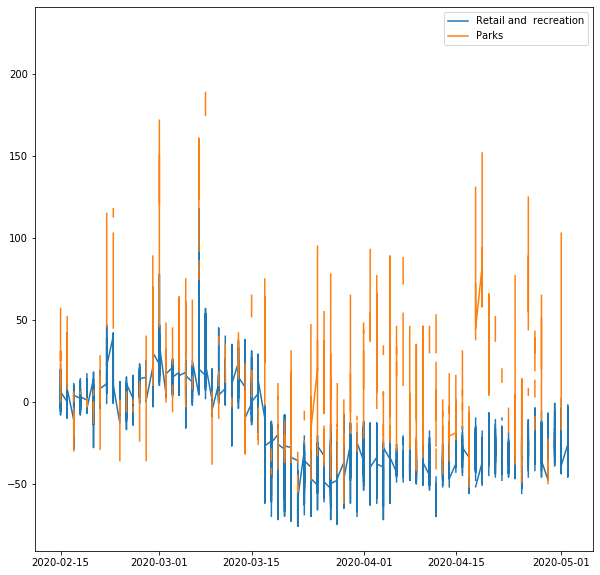

In [61]:
# Visualize all three by date
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(google_il.date, google_il.retail_and_recreation_percent_change_from_baseline, label = 'Retail and  recreation')
plt.plot(google_il.date, google_il.parks_percent_change_from_baseline, label = 'Parks')
# plt.plot(boarding_19_20.date, boarding_19_20.rail_boardings, label = 'Rail boardings')
# plt.plot(boarding_19_20.date, boarding_19_20.total_rides, label = 'Total rides')
plt.legend()

In [63]:
# Print again to double check
print(google_il)

           state           county       date  \
136229  Illinois     Adams County 2020-02-15   
139601  Illinois   LaSalle County 2020-02-15   
136509  Illinois    Bureau County 2020-02-15   
138767  Illinois   Jackson County 2020-02-15   
141115  Illinois  Moultrie County 2020-02-15   
...          ...              ...        ...   
142032  Illinois  Sangamon County 2020-05-02   
137673  Illinois   Douglas County 2020-05-02   
137595  Illinois    DeKalb County 2020-05-02   
139987  Illinois     Logan County 2020-05-02   
143361  Illinois  Woodford County 2020-05-02   

        retail_and_recreation_percent_change_from_baseline  \
136229                                                3.0    
139601                                               11.0    
136509                                               13.0    
138767                                                7.0    
141115                                               -8.0    
...                                                

In [64]:
# Filter the dataset per Chris recommendation and leave Cook County only
google_cook = google_il[google_il['county'] == 'Cook County']
google_cook

,state,county,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
137206,Illinois,Cook County,2020-02-15,5.0,1.0,17.0,3.0,2.0,-1.0
137207,Illinois,Cook County,2020-02-16,9.0,2.0,40.0,2.0,1.0,-2.0
137208,Illinois,Cook County,2020-02-17,2.0,-4.0,-18.0,-15.0,-24.0,6.0
137209,Illinois,Cook County,2020-02-18,1.0,0.0,6.0,2.0,1.0,0.0
137210,Illinois,Cook County,2020-02-19,1.0,-2.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
137279,Illinois,Cook County,2020-04-28,-42.0,-17.0,-11.0,-60.0,-56.0,17.0
137280,Illinois,Cook County,2020-04-29,-48.0,-23.0,-62.0,-65.0,-57.0,25.0
137281,Illinois,Cook County,2020-04-30,-42.0,-9.0,-32.0,-60.0,-55.0,24.0
137282,Illinois,Cook County,2020-05-01,-39.0,-8.0,3.0,-53.0,-53.0,21.0


**Discuss with the team**

In [65]:
# Export to csv
google_cook.to_csv('google_mobility.csv', sep = ',', index = False)

### Cleaning COVID-19 data

In [106]:
# Read dataset
covid_data = pd.read_csv('COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv') 
print(covid_data.head())

  ZIP Code  Week Number  Week Start    Week End  Cases - Weekly  \
0    60642           10  03/01/2020  03/07/2020             NaN   
1    60707           17  04/19/2020  04/25/2020             4.0   
2    60606           13  03/22/2020  03/28/2020             NaN   
3    60666           12  03/15/2020  03/21/2020             NaN   
4    60634           12  03/15/2020  03/21/2020             9.0   

   Cases - Cumulative  Case Rate - Weekly  Case Rate - Cumulative  \
0                 NaN                 NaN                     NaN   
1                39.0                 9.0                    90.9   
2                 NaN                 NaN                     NaN   
3                 NaN                 NaN                     NaN   
4                 9.0                12.0                    12.1   

   Tests - Weekly  Tests - Cumulative  ...  Test Rate - Cumulative  \
0               1                   1  ...                     5.4   
1             111                 386  ...

In [107]:
# Drop two columns - country_region_code country_region
covid_data.drop(covid_data.columns[[-1, -2, - 3]], axis = 1, inplace = True)

In [108]:
print(covid_data)

    ZIP Code  Week Number  Week Start    Week End  Cases - Weekly  \
0      60642           10  03/01/2020  03/07/2020             NaN   
1      60707           17  04/19/2020  04/25/2020             4.0   
2      60606           13  03/22/2020  03/28/2020             NaN   
3      60666           12  03/15/2020  03/21/2020             NaN   
4      60634           12  03/15/2020  03/21/2020             9.0   
..       ...          ...         ...         ...             ...   
655    60647           11  03/08/2020  03/14/2020             NaN   
656    60643           13  03/22/2020  03/28/2020            41.0   
657    60634           11  03/08/2020  03/14/2020             NaN   
658    60621           11  03/08/2020  03/14/2020             NaN   
659    60609           11  03/08/2020  03/14/2020             NaN   

     Cases - Cumulative  Case Rate - Weekly  Case Rate - Cumulative  \
0                   NaN                 NaN                     NaN   
1                  39.0      

In [113]:
# Rename all necessary columns
covid_data = covid_data.rename(columns = {'ZIP Code': 'zip_code', 
                                          'Week Number': 'week_number', 
                                          'Week Start': 'date_week_start',
                                          'Week End': 'date_week_end',
                                          'Cases - Weekly': 'cases_weekly',
                                          'Cases - Cumulative': 'cases_cumulative',
                                          'Tests - Weekly': 'tests_weekly',
                                          'Tests - Cumulative': 'tests_cumulative',
                                          'Deaths - Weekly': 'deaths_weekly',
                                          'Deaths - Cumulative': 'deaths_cumulative'
                                          })

In [114]:
print(covid_data.head())

  zip_code  week_number date_week_start date_week_end  cases_weekly  \
0    60642           10      03/01/2020    03/07/2020           NaN   
1    60707           17      04/19/2020    04/25/2020           4.0   
2    60606           13      03/22/2020    03/28/2020           NaN   
3    60666           12      03/15/2020    03/21/2020           NaN   
4    60634           12      03/15/2020    03/21/2020           9.0   

   cases_cumulative  Case Rate - Weekly  Case Rate - Cumulative  tests_weekly  \
0               NaN                 NaN                     NaN             1   
1              39.0                 9.0                    90.9           111   
2               NaN                 NaN                     NaN            15   
3               NaN                 NaN                     NaN             0   
4               9.0                12.0                    12.1            67   

   tests_cumulative  Test Rate - Weekly  Test Rate - Cumulative  \
0                 1

In [115]:
# Drop several more columns
covid_data.drop(covid_data.columns[[-1, -2, - 5, -6, 7, -8, -11, -12]], axis = 1, inplace = True)

In [116]:
print(covid_data.head())

  zip_code  week_number date_week_start date_week_end  cases_weekly  \
0    60642           10      03/01/2020    03/07/2020           NaN   
1    60707           17      04/19/2020    04/25/2020           4.0   
2    60606           13      03/22/2020    03/28/2020           NaN   
3    60666           12      03/15/2020    03/21/2020           NaN   
4    60634           12      03/15/2020    03/21/2020           9.0   

   cases_cumulative  tests_weekly  tests_cumulative  Test Rate - Cumulative  \
0               NaN             1                 1                     5.4   
1              39.0           111               386                   899.3   
2               NaN            15                33                  1429.8   
3               NaN             0                 0                     0.0   
4               9.0            67                74                    99.6   

   deaths_weekly  deaths_cumulative  
0              0                  0  
1              0      

In [117]:
# Drop one more column
covid_data.drop(covid_data.columns[[-3]], axis = 1, inplace = True)

In [118]:
print(covid_data.head())

  zip_code  week_number date_week_start date_week_end  cases_weekly  \
0    60642           10      03/01/2020    03/07/2020           NaN   
1    60707           17      04/19/2020    04/25/2020           4.0   
2    60606           13      03/22/2020    03/28/2020           NaN   
3    60666           12      03/15/2020    03/21/2020           NaN   
4    60634           12      03/15/2020    03/21/2020           9.0   

   cases_cumulative  tests_weekly  tests_cumulative  deaths_weekly  \
0               NaN             1                 1              0   
1              39.0           111               386              0   
2               NaN            15                33              0   
3               NaN             0                 0              0   
4               9.0            67                74              0   

   deaths_cumulative  
0                  0  
1                  2  
2                  0  
3                  0  
4                  0  


In [120]:
# Drop columns with Unknown
covid_data = covid_data[covid_data.zip_code != 'Unknown']

In [121]:
# Export to csv
covid_data.to_csv('covid_health_data.csv', sep = ',', index = False)

### Cleaning park data

In [91]:
park_data = pd.read_csv('Parks_Containing_Playgrounds.csv')
print(park_data.head())

   PARK NUMBER        PARK NAME       STREET ADDRESS    ZIP  ACRES  WARD  \
0         1139             OHIO       4712 W OHIO ST  60644   0.42    37   
1          206   ALTGELD (JOHN)  515 S WASHTENAW AVE  60612   4.32    27   
2           33  RAINEY (EDWARD)       4350 W 79TH ST  60652  18.31    13   
3          260   KELLY (EDWARD)       2725 W 41ST ST  60632   7.08    12   
4           59           ORIOLE    5430 N OLCOTT AVE  60656  18.57    41   

       PARK CLASS           LABEL  WHEELCHAIR ACCESSIBLE BALL FIELDS  \
0       MINI-PARK            Ohio                                  0   
1  COMMUNITY PARK         Altgeld                                  0   
2   REGIONAL PARK          Rainey                                  0   
3  COMMUNITY PARK  Kelly (Edward)                                  0   
4   REGIONAL PARK          Oriole                                  0   

   ALFRED CALDWELL LILY POND  ...  BOXING CENTER  WETLAND AREA  LAGOON  \
0                          0  ...   

In [92]:
# Select only 7 necessary columns
park_data = park_data[['PARK NUMBER', 'PARK NAME', 'STREET ADDRESS', 'ZIP', 'ACRES', 'PARK CLASS']]
print(park_data.head())

   PARK NUMBER        PARK NAME       STREET ADDRESS    ZIP  ACRES  \
0         1139             OHIO       4712 W OHIO ST  60644   0.42   
1          206   ALTGELD (JOHN)  515 S WASHTENAW AVE  60612   4.32   
2           33  RAINEY (EDWARD)       4350 W 79TH ST  60652  18.31   
3          260   KELLY (EDWARD)       2725 W 41ST ST  60632   7.08   
4           59           ORIOLE    5430 N OLCOTT AVE  60656  18.57   

       PARK CLASS  
0       MINI-PARK  
1  COMMUNITY PARK  
2   REGIONAL PARK  
3  COMMUNITY PARK  
4   REGIONAL PARK  


In [93]:
# Column names to lower case
park_data.columns = map(str.lower, park_data.columns)
print(park_data.head())

   park number        park name       street address    zip  acres  \
0         1139             OHIO       4712 W OHIO ST  60644   0.42   
1          206   ALTGELD (JOHN)  515 S WASHTENAW AVE  60612   4.32   
2           33  RAINEY (EDWARD)       4350 W 79TH ST  60652  18.31   
3          260   KELLY (EDWARD)       2725 W 41ST ST  60632   7.08   
4           59           ORIOLE    5430 N OLCOTT AVE  60656  18.57   

       park class  
0       MINI-PARK  
1  COMMUNITY PARK  
2   REGIONAL PARK  
3  COMMUNITY PARK  
4   REGIONAL PARK  


In [94]:
# Rename column names
park_data = park_data.rename(columns = {'park number': 'park_id', 'park name': 'park_name', 
                                        'street address': 'street_address', 'zip': 'zip_code',
                                        'park class': 'park_class'})
print(park_data.head())

   park_id        park_name       street_address  zip_code  acres  \
0     1139             OHIO       4712 W OHIO ST     60644   0.42   
1      206   ALTGELD (JOHN)  515 S WASHTENAW AVE     60612   4.32   
2       33  RAINEY (EDWARD)       4350 W 79TH ST     60652  18.31   
3      260   KELLY (EDWARD)       2725 W 41ST ST     60632   7.08   
4       59           ORIOLE    5430 N OLCOTT AVE     60656  18.57   

       park_class  
0       MINI-PARK  
1  COMMUNITY PARK  
2   REGIONAL PARK  
3  COMMUNITY PARK  
4   REGIONAL PARK  


In [96]:
# Capitalize column names
park_data.park_name = park_data.park_name.str.title()
park_data.street_address = park_data.street_address.str.title()
park_data.park_class = park_data.park_class.str.title()
print(park_data.head())

   park_id        park_name       street_address  zip_code  acres  \
0     1139             Ohio       4712 W Ohio St     60644   0.42   
1      206   Altgeld (John)  515 S Washtenaw Ave     60612   4.32   
2       33  Rainey (Edward)       4350 W 79Th St     60652  18.31   
3      260   Kelly (Edward)       2725 W 41St St     60632   7.08   
4       59           Oriole    5430 N Olcott Ave     60656  18.57   

       park_class  
0       Mini-Park  
1  Community Park  
2   Regional Park  
3  Community Park  
4   Regional Park  


In [97]:
# Save as .csv
park_data.to_csv('park_data.csv', sep = ',', index = False)

### Cleaning Apple data

In [216]:
apple_data = pd.read_csv('applemobilitytrends-2020-05-06.csv')
print(apple_data.head())

         geo_type     region transportation_type alternative_name  2020-01-13  \
0  country/region    Albania             driving              NaN       100.0   
1  country/region    Albania             walking              NaN       100.0   
2  country/region  Argentina             driving              NaN       100.0   
3  country/region  Argentina             walking              NaN       100.0   
4  country/region  Australia             driving              NaN       100.0   

   2020-01-14  2020-01-15  2020-01-16  2020-01-17  2020-01-18  ...  \
0       95.30      101.43       97.20      103.55      112.67  ...   
1      100.68       98.93       98.46      100.85      100.13  ...   
2       97.07      102.45      111.21      118.45      124.01  ...   
3       95.11      101.37      112.67      116.72      114.14  ...   
4      102.98      104.21      108.63      109.08       89.00  ...   

   2020-04-27  2020-04-28  2020-04-29  2020-04-30  2020-05-01  2020-05-02  \
0       37.39  

In [217]:
# Filter Chicago only
# Filter the dataset per Chris recommendation and leave Cook County only
apple_chicago = apple_data[apple_data['region'] == 'Chicago']
print(apple_chicago.head())

    geo_type   region transportation_type alternative_name  2020-01-13  \
224     city  Chicago             driving              NaN       100.0   
225     city  Chicago             transit              NaN       100.0   
226     city  Chicago             walking              NaN       100.0   

     2020-01-14  2020-01-15  2020-01-16  2020-01-17  2020-01-18  ...  \
224      103.68      104.45      108.72      132.80      113.44  ...   
225      100.93      100.61      103.79      120.72      100.06  ...   
226      104.58      107.20      104.82      128.05      142.28  ...   

     2020-04-27  2020-04-28  2020-04-29  2020-04-30  2020-05-01  2020-05-02  \
224       62.12       64.69       62.47       68.94       82.63       84.47   
225       23.38       23.51       22.92       24.02       25.48       26.35   
226       48.90       52.88       42.55       52.79       69.78       82.16   

     2020-05-03  2020-05-04  2020-05-05  2020-05-06  
224       64.17       67.98       68.33    

In [218]:
# Drop two columns
apple_chicago.drop(['geo_type', 'alternative_name'], axis = 1, inplace = True)

In [219]:
print(apple_chicago.head())

      region transportation_type  2020-01-13  2020-01-14  2020-01-15  \
224  Chicago             driving       100.0      103.68      104.45   
225  Chicago             transit       100.0      100.93      100.61   
226  Chicago             walking       100.0      104.58      107.20   

     2020-01-16  2020-01-17  2020-01-18  2020-01-19  2020-01-20  ...  \
224      108.72      132.80      113.44       87.48      100.24  ...   
225      103.79      120.72      100.06       76.40       94.32  ...   
226      104.82      128.05      142.28       94.61       94.64  ...   

     2020-04-27  2020-04-28  2020-04-29  2020-04-30  2020-05-01  2020-05-02  \
224       62.12       64.69       62.47       68.94       82.63       84.47   
225       23.38       23.51       22.92       24.02       25.48       26.35   
226       48.90       52.88       42.55       52.79       69.78       82.16   

     2020-05-03  2020-05-04  2020-05-05  2020-05-06  
224       64.17       67.98       68.33       74.81

In [220]:
# Melt
apple_chicago = (apple_chicago.set_index(['region', 'transportation_type']).rename_axis(['date'], axis = 1).
stack().reset_index())

In [221]:
# List column names
list(test)

['region', 'transportation_type', 'date', 0]

In [222]:
# Rename column 0
apple_chicago = apple_chicago.rename(columns = {0 : 'value', 'region': 'city'})
print(apple_chicago)

        city transportation_type        date   value
0    Chicago             driving  2020-01-13  100.00
1    Chicago             driving  2020-01-14  103.68
2    Chicago             driving  2020-01-15  104.45
3    Chicago             driving  2020-01-16  108.72
4    Chicago             driving  2020-01-17  132.80
..       ...                 ...         ...     ...
340  Chicago             walking  2020-05-02   82.16
341  Chicago             walking  2020-05-03   64.79
342  Chicago             walking  2020-05-04   52.80
343  Chicago             walking  2020-05-05   49.94
344  Chicago             walking  2020-05-06   63.42

[345 rows x 4 columns]


In [223]:
# Save data as csv
apple_chicago.to_csv('apple_data.csv', sep = ',', index = False)

### Clean jobs data

In [239]:
# Read data
jobs_data = pd.read_csv('where_people_work_clean.csv')
print(jobs_data.head())

                                           type   60601   60602   60603  \
0                                All industries  83,381  26,463  56,667   
1     Agriculture, forestry, fishing, & hunting       0       0       0   
2  Mining, quarrying, & oil and gas extraction        0       0       0   
3                                     Utilities       0       0       0   
4                                  Construction     543     112     321   

    60604    60606   60607   60608   60609   60610  ...  60651  60652  60653  \
0  36,249  139,075  48,948  30,651  16,738  86,392  ...  5,735  5,665  2,917   
1       0        0      10       0       0       0  ...      0      0      0   
2       0        0       0       0       0       0  ...      0      0      0   
3       0      545       0       0       0       0  ...      0      0      0   
4     145    1,508   2,318     633     503     657  ...    354    202     98   

   60655  60656   60657  60659   60660   60661   60666  
0  3,286  4

In [240]:
# Melt
jobs_data = (jobs_data.set_index(['type']).rename_axis(['zip'], axis = 1).
stack().reset_index())

In [241]:
# Rename 0 column
jobs_data = jobs_data.rename(columns = {0 : 'value', 'zip': 'zip_code', 'type': 'industry_id'})

In [242]:
# Print long dataframe
print(jobs_data)

                                 industry_id zip_code    value
0                             All industries    60601   83,381
1                             All industries    60602   26,463
2                             All industries    60603   56,667
3                             All industries    60604   36,249
4                             All industries    60606  139,075
...                                      ...      ...      ...
1171  Other services (except public admin.)     60657    1,699
1172  Other services (except public admin.)     60659      329
1173  Other services (except public admin.)     60660      421
1174  Other services (except public admin.)     60661    1,277
1175  Other services (except public admin.)     60666       50

[1176 rows x 3 columns]


In [243]:
# Save data as csv
jobs_data.to_csv('geo_work.csv', sep = ',', index = False)